<H2>Part 1</H2>
<H3>Object detection</H3>

In [ ]:
!unzip Images.zip

Streaming output truncated to the last 5000 lines.
  inflating: Images/00000630.jpg     
  inflating: Images/00000631.jpg     
  inflating: Images/00000632.jpg     
  inflating: Images/00000633.jpg     
  inflating: Images/00000634.jpg     
  inflating: Images/00000635.jpg     
  inflating: Images/00000636.jpg     
  inflating: Images/00000637.jpg     
  inflating: Images/00000638.jpg     
  inflating: Images/00000639.jpg     
  inflating: Images/00000640.jpg     
  inflating: Images/00000641.jpg     
  inflating: Images/00000642.jpg     
  inflating: Images/00000643.jpg     
  inflating: Images/00000644.jpg     
  inflating: Images/00000645.jpg     
  inflating: Images/00000646.jpg     
  inflating: Images/00000647.jpg     
  inflating: Images/00000648.jpg     
  inflating: Images/00000649.jpg     
  inflating: Images/00000650.jpg     
  inflating: Images/00000651.jpg     
  inflating: Images/00000652.jpg     
  inflating: Images/00000653.jpg     
  inflating: Images/00000654.jpg     

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.0/112.6 GB disk)


In [ ]:
!pwd

/content/yolov5


In [ ]:
import cv2

In [ ]:
import os
import pandas as pd
import cv2

# Define paths
#csv_file = 'vehiclelabels.csv'
images_dir = '/content/Images'
output_dir = 'outputCompatible'

# Create output directories if they do not exist
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'labels'), exist_ok=True)

# Read the CSV file
df = pd.read_csv("/content/Auto_Driving_Data.csv")

# Define a mapping for class names to class IDs
class_mapping = {'articulated_truck': 0, 'bicycle': 1,'bus': 2, 'car': 3,'motorcycle': 4, 'motorized_vehicle': 5,'non-motorized_vehicle': 6, 'pedestrian': 7,'pickup_truck': 8,'single_unit_truck': 9, 'work_van': 10}  # Update this with your classes





In [ ]:
for index, row in df.iterrows():
    image_name = f"{row['Image']:08d}"+".jpg"
    print('image_name - ',image_name)
    image_path = os.path.join(images_dir, image_name)
    print('image_path - ',image_path)
    output_image_path = os.path.join(output_dir, 'images', image_name)
    print('output_image_path - ', output_image_path)
    label_path = os.path.join(output_dir, 'labels', os.path.splitext(image_name)[0] + '.txt')
    print('label_path - ',label_path)

    os.system(f'cp {image_path} {output_image_path}')

    # Get bounding box information
    class_name = row['label']
    print('class_name - ', class_name)
    class_id = class_mapping[class_name]
    xmin = row['xmin']
    ymin = row['ymin']
    xmax = row['xmax']
    ymax = row['ymax']

    # Calculate normalized coordinates
    img = cv2.imread(image_path)
    img_h, img_w, _ = img.shape
    x_center = (xmin + xmax) / 2 / img_w
    y_center = (ymin + ymax) / 2 / img_h
    w = (xmax - xmin) / img_w
    h = (ymax - ymin) / img_h

    # Write to the label file
    with open(label_path, 'w') as f:
        f.write(f'{class_id} {x_center} {y_center} {w} {h}\n')

print('Dataset conversion completed!')

Streaming output truncated to the last 5000 lines.
image_path -  /content/Images/00005366.jpg
output_image_path -  outputCompatible/images/00005366.jpg
label_path -  outputCompatible/labels/00005366.txt
class_name -  car
image_name -  00005366.jpg
image_path -  /content/Images/00005366.jpg
output_image_path -  outputCompatible/images/00005366.jpg
label_path -  outputCompatible/labels/00005366.txt
class_name -  car
image_name -  00005366.jpg
image_path -  /content/Images/00005366.jpg
output_image_path -  outputCompatible/images/00005366.jpg
label_path -  outputCompatible/labels/00005366.txt
class_name -  car
image_name -  00005366.jpg
image_path -  /content/Images/00005366.jpg
output_image_path -  outputCompatible/images/00005366.jpg
label_path -  outputCompatible/labels/00005366.txt
class_name -  articulated_truck
image_name -  00005366.jpg
image_path -  /content/Images/00005366.jpg
output_image_path -  outputCompatible/images/00005366.jpg
label_path -  outputCompatible/labels/00005366

In [ ]:
%%writefile custom_dataset.yaml

train: outputCompatible/images
val: outputCompatible/valimages

# number of classes
nc: 11  # Update this with the number of your classes

# class names
names: ['articulated_truck','bicycle','bus','car','motorcycle','motorized_vehicle','non-motorized_vehicle','pedestrian','pickup_truck','single_unit_truck','work_van']  # Update this with your class names



Overwriting custom_dataset.yaml


In [ ]:
!python train.py --img 640 --batch 16 --epochs 100 --data custom_dataset.yaml --weights yolov5s.pt --cache

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      93/99      3.82G    0.01867    0.00984   0.003118         24        640:  18% 62/352 [00:19<01:34,  3.08it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      93/99      3.82G    0.01864   0.009811   0.003079         25        640:  18% 63/352 [00:20<01:35,  3.03it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      93/99      3.82G    0.01866   0.009809   0.003072         28        640:  18% 64/352 [00:20<01:31,  3.14it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp

In [ ]:
!nvidia-smi

Sun Dec 15 07:49:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8              12W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp6/weights/best.pt')  # Update the path to your weights file

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7039792 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1: 480x720 2 cars, 1 motorized_vehicle
Speed: 4.3ms pre-process, 57.4ms inference, 582.6ms NMS per image at shape (1, 3, 448, 640)


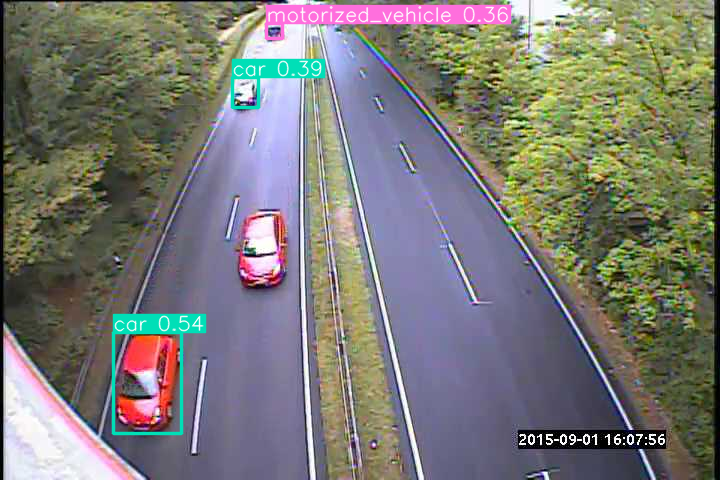

In [ ]:
# Load an image
img_path = '/content/00000083.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run inference
results = model(img_rgb)

# Print results
results.print()

# Display results
results.show()

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 228x342 2 cars
Speed: 2.9ms pre-process, 8.4ms inference, 2.7ms NMS per image at shape (1, 3, 448, 640)


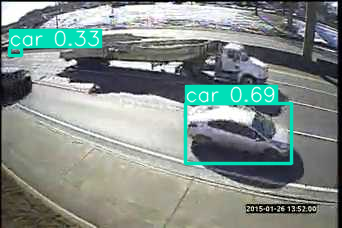

In [ ]:
# Load an image
img_path = '/content/00000311.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run inference
results = model(img_rgb)

# Print results
results.print()

# Display results
results.show()

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 480x720 3 cars
Speed: 3.1ms pre-process, 7.5ms inference, 3.5ms NMS per image at shape (1, 3, 448, 640)


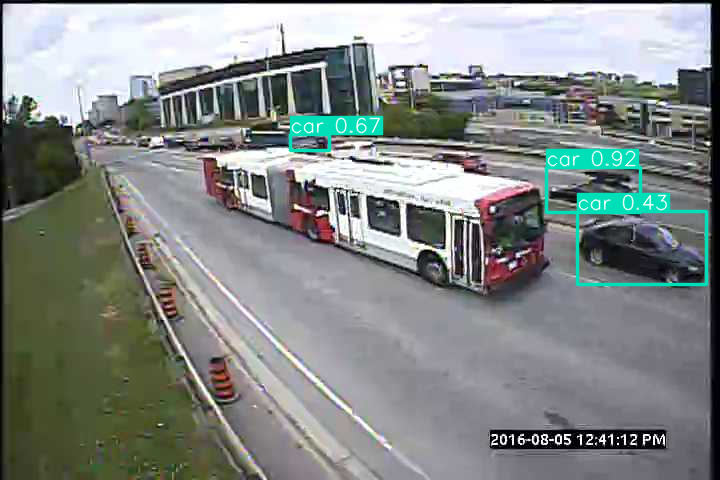

In [ ]:
# Load an image
img_path = '/content/00000161.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run inference
results = model(img_rgb)

# Print results
results.print()

# Display results
results.show()

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 480x720 3 cars
Speed: 2.3ms pre-process, 7.6ms inference, 3.0ms NMS per image at shape (1, 3, 448, 640)


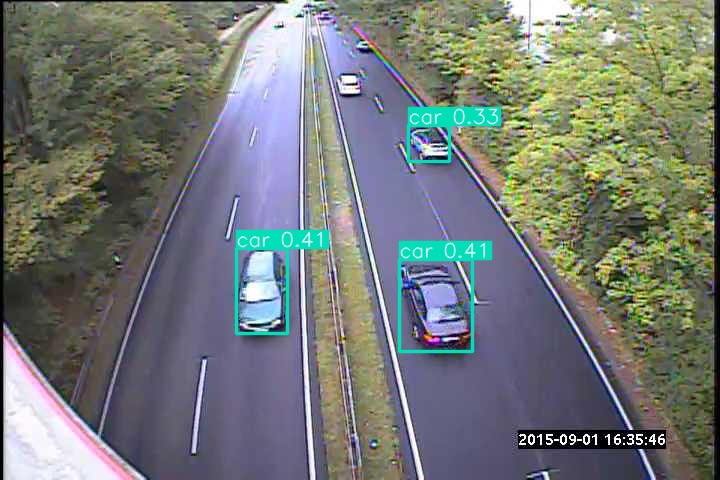

In [ ]:
# Load an image
img_path = '/content/00000718.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run inference
results = model(img_rgb)

# Print results
results.print()

# Display results
results.show()